# Spot detection for RNA imaging

Neubias course. May 14 th and may 15 th 2025. Pasteur Institute. 

Teacher: Jacques Bourg    
Helper:  Gaëlle Letort

In [6]:
import napari
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from Conv_explorer import ConvolutionExplorer
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# I- Understanding the FISH signal. 

#### Nature of the signal and orders of magnitude

<div style="text-align: center;">
  <img src="T2.png" alt="FISH imaging" width="1413" height="219">
</div>

#### What is a point spread function ? 

According to Wikipedia, the point spread function (PSF) describes the "response of a focused optical imaging system to a point source or point object".  
The image gatered though an optical imaging system results from the convolution of the real light source with the PSF. 

 
<div style="text-align: center;">
  <img src="PSF.png" alt="FISH imaging" width="298" height="272">
</div>

Wikimedia Commons contributor.  Convolution illustrated: longitudinal (XZ) central slice of a 3D image acquired by a fluorescence microscope. [9 June 2006]. Wikimedia Commons, CC BY-SA 4.0.

For more details, read the full article.
https://en.wikipedia.org/wiki/Point_spread_function


In the next section we will go in detail in what a convolution is.

#### Signal exploration

Given the physical dimensions of the fluorophore (~ 2 nm) and that the spots that we observe in the next have a couple of pixels (each pixel in this image ~ 100 nm), what we observe is the PSF.

In the napari plugin you have two channels, the FISH channel (550 nm) and the DAPI channel (405 nm). You can change the Z and change the contrast to observe the FISH signal.

DAPI  is a fluorescent stain that binds strongly to adenine-thymine-rich regions in DNA, and therefore used as a nuclei marker.

In [3]:
im = io.imread('XPO-Im1-Cy3_MMStack_Pos0.ome.tif')
viewer = napari.Viewer()
viewer.add_image(im)

<Image layer 'im' at 0x7a3230cc81c0>

##  Algorithms for spot detection

####  a) Practical introduction to the convolution operation

<p align="center">
  <img src="./2D_Convolution_Animation.gif" alt="2D Convolution Animation" title="2D Convolution Animation">
</p>

Michael Plotke. (2013). 2D Convolution Animation. Wikimedia Commons. Retrieved 02/05/2025.

The convolution operation has several subtleties. We propose you to discover some of them by yourself by playing with the following tool. 

Look for instance at the :

- Influence of the kernel size.
- Apparition of artifacts.
- impact of the noise level on a posterior thresholding
- Selectivity of kernel when the kernel has a positive and negarive part (sum = 0)
- Superposition effects
- Effect of the inhibition
- Effect of the width of the inhibition
- Noise enhancement effect.
- False positives at high noise (if there was a threshold after the convolution).

Feel free to change the image or to add new kernels.

In [15]:
image = np.zeros((100, 100))
image[20:40,20:40] = 1
image[60,20] = 7
image[80,20] = 2
l = 5
image[80-l:80+l+1,80] = 1
image[80,80-l:80+l+1] = 1
image[20-l:20+l+1,80] = 3
image[20,80-l:80+l+1] = 3
image[80,50]   = 3
image[80-3,50] = 3

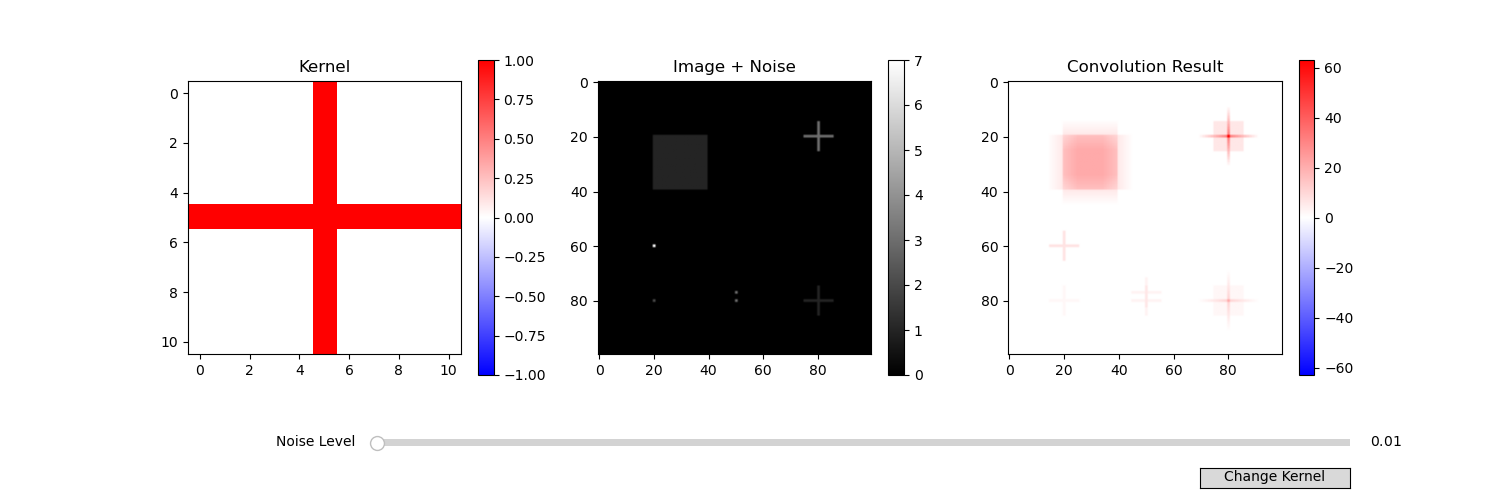

In [16]:
%matplotlib widget
explorer = ConvolutionExplorer(image)
explorer.show()

####  b) Traditional spot detection method: example of BIGFISH.

Big fish is an example of spot detection method developped by Florian Muller and colleagues, that employs classic computer vision techniques. 


* Imbert, A., Ouyang, W., Safieddine, A., Coleno, E., Zimmer, C., Bertrand, E., Walter, T., & Mueller, F. (2022). FISH-quant v2: a scalable and modular tool for smFISH image analysis. RNA, 28(6), 786-795. http://www.rnajournal.org/cgi/pmidlookup?view=long&pmid=35347070


* Mueller, F., Senecal, A., Tantale, K., Marie-Nelly, H., Ly, N., Collin, O., Basyuk, E., Bertrand, E., Darzacq, X., & Zimmer, C. (2013). FISH-quant: automatic counting of transcripts in 3D FISH images. Nature Methods, 10(4), 277-278. https://doi.org/10.1038/nmeth.2406


In the next figure we describe the main steps of the algorithm, and we will visualize them afterwards on the data.

<div style="text-align: center;">
  <img src="BigFISH_pipeline.png" alt="FISH imaging" width="1413" height="241">
</div>

In [ ]:
im_fish = im[0,...]





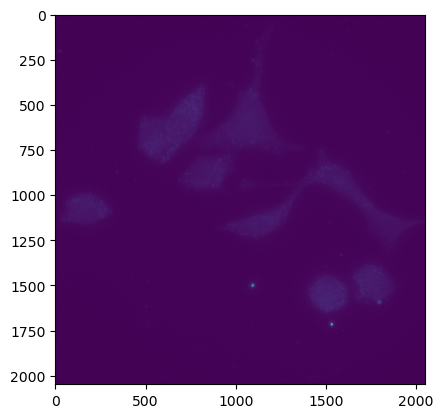

In [10]:
fig, ax = plt.subplots()
ax.imshow(np.max(im_fish,axis=0))

Biological questions:

   There are plenty of biological questions related to where and when specific genes are being expressed within cells. 

    For instance:
      * Is the rna cytoplasmic or nuclear at the observed stage ? 
      * What is the dynamic of expression of rna ?  
      * Does two genes are coexpressed in a same cell ? in a same particular location of the cell ? 

Quantifiying gene expression: 

Gene expression